In [641]:
import requests
import pandas as pd

In [642]:
limit = 10000000

In [643]:
url = f'https://data.cdc.gov/resource/u6jv-9ijr.json?$limit={limit}'

In [644]:
data = requests.get(url)
data

<Response [200]>

In [645]:
data = data.json()

In [646]:
death_counts_df = pd.DataFrame(data)
death_counts_df.head()

,jurisdiction,week_ending_date,state_abbreviation,mmwryear,mmwrweek,cause_group,number_of_deaths,cause_subgroup,time_period,average_number_of_deaths,type,difference_from_2015_2019_to_2020,percent_difference_from_15_19_to_20,note
0,New Jersey,2018-02-03T00:00:00.000,NJ,2018,5,Other select causes,49,Sepsis,2015-2019,42,Predicted (weighted),NaN,NaN,NaN
1,Alabama,2015-01-10T00:00:00.000,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Predicted (weighted),NaN,NaN,NaN
2,Alabama,2015-01-10T00:00:00.000,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Unweighted,NaN,NaN,NaN
3,Alabama,2016-01-09T00:00:00.000,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Predicted (weighted),NaN,NaN,NaN
4,Alabama,2016-01-09T00:00:00.000,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Unweighted,NaN,NaN,NaN


In [647]:
# limit it to unweighted actual data
death_counts_df = death_counts_df.loc[death_counts_df['type'] == "Unweighted"]

In [648]:
death_counts_df = death_counts_df[['week_ending_date', 'number_of_deaths', 'cause_group' ]]

In [649]:
death_counts_df['week_ending_date'] = pd.to_datetime(death_counts_df['week_ending_date'])
death_counts_df['number_of_deaths'] = pd.to_numeric(death_counts_df['number_of_deaths'])

In [650]:
death_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240570 entries, 2 to 481138
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   week_ending_date  240570 non-null  datetime64[ns]
 1   number_of_deaths  240570 non-null  int64         
 2   cause_group       240570 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.3+ MB


In [651]:
death_counts_df = death_counts_df.groupby(by=[ 'week_ending_date', 'cause_group']).sum()

In [652]:
death_counts_df

number_of_deaths
week_ending_date cause_group                                     
2015-01-10       Alzheimer disease and dementia             12411
                 Circulatory diseases                       38866
                 Malignant neoplasms                        23871
                 Other select causes                         7708
                 Respiratory diseases                       15953
...                                                           ...
2023-09-09       Alzheimer disease and dementia              9736
                 Circulatory diseases                       27349
                 Malignant neoplasms                        20783
                 Other select causes                         5306
                 Respiratory diseases                        7404

[2265 rows x 1 columns]

In [653]:
death_counts_df = death_counts_df.reset_index()
death_counts_df.head()

,week_ending_date,cause_group,number_of_deaths
0,2015-01-10,Alzheimer disease and dementia,12411
1,2015-01-10,Circulatory diseases,38866
2,2015-01-10,Malignant neoplasms,23871
3,2015-01-10,Other select causes,7708
4,2015-01-10,Respiratory diseases,15953


In [654]:
death_counts_pivoted = pd.pivot_table(death_counts_df, columns=["cause_group"], index="week_ending_date", values="number_of_deaths",aggfunc="sum")
death_counts_pivoted.head()

cause_group,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases
week_ending_date,,,,,
2015-01-10,12411,38866,23871,7708,15953
2015-01-17,12735,38081,23991,7766,15185
2015-01-24,11649,36395,23462,7553,14352
2015-01-31,11279,35525,23585,7174,13506
2015-02-07,11045,36279,23454,7056,13020


In [655]:
death_counts_pivoted['total'] = death_counts_pivoted[death_counts_pivoted.columns].sum(axis=1)
death_counts_pivoted.head()

cause_group,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases,total
week_ending_date,,,,,,
2015-01-10,12411,38866,23871,7708,15953,98809
2015-01-17,12735,38081,23991,7766,15185,97758
2015-01-24,11649,36395,23462,7553,14352,93411
2015-01-31,11279,35525,23585,7174,13506,91069
2015-02-07,11045,36279,23454,7056,13020,90854


<Axes: xlabel='week_ending_date'>

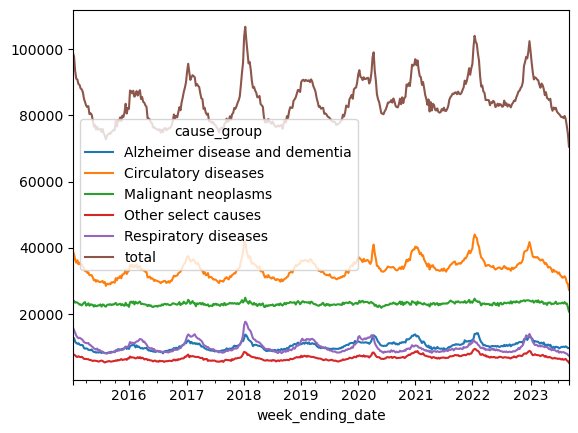

In [656]:
death_counts_pivoted.plot()

In [657]:
clean_death_counts_df = death_counts_pivoted
%store clean_death_counts_df

Stored 'clean_death_counts_df' (DataFrame)
